# Identify and Remove Seasonality from Time Series Data

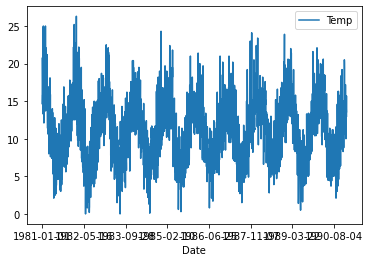

In [34]:
# Import data
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
series.plot()
pyplot.show()

# Seasonal Adjustment with Differencing

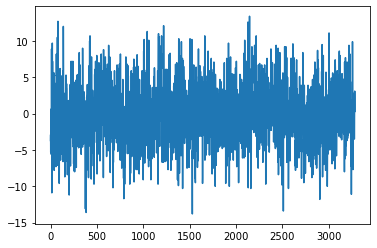

In [35]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

# Differencing Sesaonal Adjusted Minimum Daily Temperature

                 Temp
Date                 
1981-01-31  17.712903
1981-02-28  17.678571
1981-03-31  13.500000
1981-04-30  12.356667
1981-05-31   9.490323
1981-06-30   7.306667
1981-07-31   7.577419
1981-08-31   7.238710
1981-09-30  10.143333
1981-10-31  10.087097
1981-11-30  11.890000
1981-12-31  13.680645
1982-01-31  16.567742


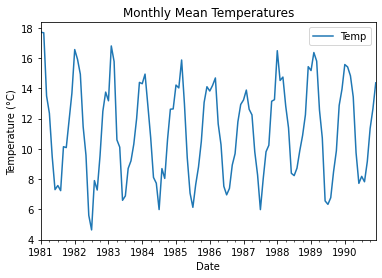

In [36]:
from pandas import read_csv, to_datetime
from matplotlib import pyplot as plt

# Load the dataset
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)

# Convert index to datetime if it's not already
series.index = to_datetime(series.index)

# Resample the data to monthly means
resample = series.resample('M')
monthly_mean = resample.mean()

# Display the first 13 months
print(monthly_mean.head(13))

# Plot the monthly means
monthly_mean.plot()
plt.title('Monthly Mean Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()


# Seasonally Adjusted Minimum Monthly Temperature Dataset

<ipython-input-37-5eabb6d4e2f5>:16: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  month_mean_last_year = series[month_str].mean()


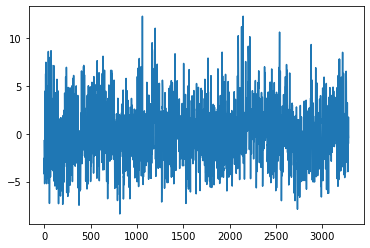

In [37]:
from pandas import read_csv, to_datetime
from matplotlib import pyplot as plt

# Load the dataset
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)

# Convert the index to datetime
series.index = to_datetime(series.index)

# Now you can proceed with your code
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    month_str = str(series.index[i].year - 1) + '-' + str(series.index[i].month)
    month_mean_last_year = series[month_str].mean()
    value = X[i] - month_mean_last_year
    diff.append(value)

# Plot the differences
plt.plot(diff)
plt.show()


# Seasonal Adjustment with Modeling

Coefficients: [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


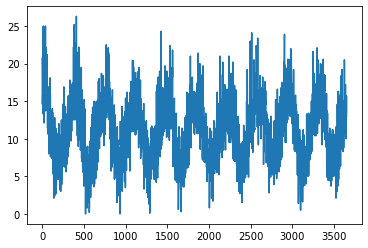

In [38]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
for d in range(degree):
    value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()

# Curve Fit Seasonal Model of Daily Minimum Temperature

Coefficients: [[-1.17308000e-08]
 [ 9.30253946e-06]
 [-2.15977594e-03]
 [ 1.19147966e-01]
 [ 1.38980178e+01]]


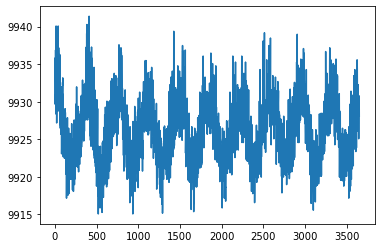

In [20]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import polyfit

# Load the dataset
series = read_csv('daily-min-temperatures.csv', header=0, index_col=0)

# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i % 365 for i in range(0, len(series))]
y = series.values
degree = 4
coef = polyfit(X, y, degree)
print('Coefficients:', coef)

# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i] ** (degree - d) * coef[d]
    curve.append(value)

# create seasonally adjusted
values = series.values
diff = list()
for i in range(len(values)):
    value = values[i] - curve[i]
    diff.append(value)

pyplot.plot(diff)
pyplot.show()
